## WeatherPy
----

#### Observations
* Max Temperature has a high correlation with Latitude. Most notably the hottest temperatures found closest to the equator 
* Most cities had a humidity above 40% with the majority falling between 60% and 100%.
* There is no observable trend between cloudiness and latitude.
* Wind speed most often stay below 15 mph but the greatest wind speeds and variations seem to occur after a latitude of 60 degrees north. 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [5]:
cities_df = pd.DataFrame(cities)
cities_df.columns = ["City"]
cities_df

,City
0,taolanaro
1,hermanus
2,atuona
3,margate
4,mataura
...,...
601,korla
602,kuty
603,mafeteng
604,marrakesh


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""
cities_df['Max Temp'] = ""
cities_df.head()   

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,taolanaro,,,,,,,,
1,hermanus,,,,,,,,
2,atuona,,,,,,,,
3,margate,,,,,,,,
4,mataura,,,,,,,,


In [7]:
#pprint result to view API format
for city in cities: 
    url = "http://api.openweathermap.org/data/2.5/weather?"
        # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    pprint(weather_json)
    break

{'cod': '404', 'message': 'city not found'}


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"

for index, city in cities_df.iterrows():
    
    #get city name from dataframe
    city_name = city['City']
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city_name + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #pprint(weather_json)
    print(f"Retrieving Results for Index {index}: {city_name}.")
    #break to test first results
    
    # extract results
    try:
        cities_df.loc[index, 'Country'] = weather_json['sys']['country']
        cities_df.loc[index, 'Date'] = datetime.datetime.fromtimestamp(weather_json["dt"])
        cities_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        cities_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        cities_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for Index 0: taolanaro.
Missing field/result... skipping.
------------
Retrieving Results for Index 1: hermanus.
------------
Retrieving Results for Index 2: atuona.
------------
Retrieving Results for Index 3: margate.
------------
Retrieving Results for Index 4: mataura.
------------
Retrieving Results for Index 5: vila franca do campo.
------------
Retrieving Results for Index 6: albany.
------------
Retrieving Results for Index 7: rikitea.
------------
Retrieving Results for Index 8: kiruna.
------------
Retrieving Results for Index 9: jamestown.
------------
Retrieving Results for Index 10: klaksvik.
------------
Retrieving Results for Index 11: hobart.
------------
Retrieving Results for Index 12: turbat.
------------
Retrieving Results for Index 13: ancud.
------------
Retrieving Results for Index 14: ostrovnoy.
------------
Retrieving Results for Index 15: saskylakh.
------------
Retrieving Results for Index 16: barrow.
------------
Retrieving Results for Ind

Retrieving Results for Index 140: hasaki.
------------
Retrieving Results for Index 141: novopokrovka.
------------
Retrieving Results for Index 142: georgetown.
------------
Retrieving Results for Index 143: carnarvon.
------------
Retrieving Results for Index 144: broome.
------------
Retrieving Results for Index 145: derazhnya.
------------
Retrieving Results for Index 146: iracoubo.
------------
Retrieving Results for Index 147: lasa.
------------
Retrieving Results for Index 148: tomakomai.
------------
Retrieving Results for Index 149: champerico.
------------
Retrieving Results for Index 150: aksarka.
------------
Retrieving Results for Index 151: mount gambier.
------------
Retrieving Results for Index 152: mana.
------------
Retrieving Results for Index 153: tsihombe.
Missing field/result... skipping.
------------
Retrieving Results for Index 154: saint-philippe.
------------
Retrieving Results for Index 155: aklavik.
------------
Retrieving Results for Index 156: wedel.
-----

Retrieving Results for Index 277: port lincoln.
------------
Retrieving Results for Index 278: tiksi.
------------
Retrieving Results for Index 279: kununurra.
------------
Retrieving Results for Index 280: saint george.
------------
Retrieving Results for Index 281: alamogordo.
------------
Retrieving Results for Index 282: geraldton.
------------
Retrieving Results for Index 283: tapes.
------------
Retrieving Results for Index 284: ladario.
------------
Retrieving Results for Index 285: ferkessedougou.
------------
Retrieving Results for Index 286: okoneshnikovo.
------------
Retrieving Results for Index 287: sumbe.
------------
Retrieving Results for Index 288: bafra.
------------
Retrieving Results for Index 289: nanakuli.
------------
Retrieving Results for Index 290: puerto el triunfo.
------------
Retrieving Results for Index 291: bagan.
------------
Retrieving Results for Index 292: phuket.
------------
Retrieving Results for Index 293: santa luzia.
------------
Retrieving Res

Retrieving Results for Index 416: serebryansk.
------------
Retrieving Results for Index 417: semey.
------------
Retrieving Results for Index 418: balugaon.
------------
Retrieving Results for Index 419: vigrestad.
------------
Retrieving Results for Index 420: mehamn.
------------
Retrieving Results for Index 421: mahajanga.
------------
Retrieving Results for Index 422: pacifica.
------------
Retrieving Results for Index 423: labuhan.
------------
Retrieving Results for Index 424: genhe.
------------
Retrieving Results for Index 425: acapulco.
------------
Retrieving Results for Index 426: northam.
------------
Retrieving Results for Index 427: arraial do cabo.
------------
Retrieving Results for Index 428: tondano.
------------
Retrieving Results for Index 429: aswan.
------------
Retrieving Results for Index 430: hadrut.
------------
Retrieving Results for Index 431: lufilufi.
------------
Retrieving Results for Index 432: alice springs.
------------
Retrieving Results for Index 4

Retrieving Results for Index 555: leeston.
------------
Retrieving Results for Index 556: rorvik.
------------
Retrieving Results for Index 557: eseka.
------------
Retrieving Results for Index 558: gigmoto.
------------
Retrieving Results for Index 559: necochea.
------------
Retrieving Results for Index 560: huarmey.
------------
Retrieving Results for Index 561: inhambane.
------------
Retrieving Results for Index 562: ouadda.
------------
Retrieving Results for Index 563: chengde.
------------
Retrieving Results for Index 564: srednekolymsk.
------------
Retrieving Results for Index 565: lubango.
------------
Retrieving Results for Index 566: leshukonskoye.
------------
Retrieving Results for Index 567: mvomero.
------------
Retrieving Results for Index 568: souillac.
------------
Retrieving Results for Index 569: kavieng.
------------
Retrieving Results for Index 570: jiayuguan.
------------
Retrieving Results for Index 571: shimoda.
------------
Retrieving Results for Index 572: 

### Convert Raw Data to DataFrame


In [9]:
#Display the DataFrame
cities_df

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,taolanaro,,,,,,,,
1,hermanus,ZA,2020-04-11 16:46:54,-34.42,19.23,93,100,18.01,63
2,atuona,PF,2020-04-11 16:46:55,-9.8,-139.03,66,48,5.77,82.89
3,margate,GB,2020-04-11 16:46:55,51.38,1.39,87,41,3.36,57
4,mataura,NZ,2020-04-11 16:46:55,-46.19,168.86,58,93,1.99,64
...,...,...,...,...,...,...,...,...,...
601,korla,CN,2020-04-11 16:49:40,41.76,86.15,41,69,4,59
602,kuty,UA,2020-04-11 16:49:41,48.26,25.18,67,0,1.21,37.54
603,mafeteng,LS,2020-04-11 16:49:41,-29.82,27.24,38,4,7.54,56.34
604,marrakesh,MA,2020-04-11 16:49:41,31.63,-8.01,72,94,5.82,60.8


In [10]:
#export to CSV
cities_df.to_csv('../output_data/cities.csv')

In [11]:
weather_data = pd.DataFrame(cities_df)
weather_data.head()

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,taolanaro,,,,,,,,
1,hermanus,ZA,2020-04-11 16:46:54,-34.42,19.23,93,100,18.01,63
2,atuona,PF,2020-04-11 16:46:55,-9.8,-139.03,66,48,5.77,82.89
3,margate,GB,2020-04-11 16:46:55,51.38,1.39,87,41,3.36,57
4,mataura,NZ,2020-04-11 16:46:55,-46.19,168.86,58,93,1.99,64


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [12]:
x_values = pd.to_numeric(weather_data['Lat'], downcast="float")
y_values = pd.to_numeric(weather_data['Max Temp'], downcast="float")

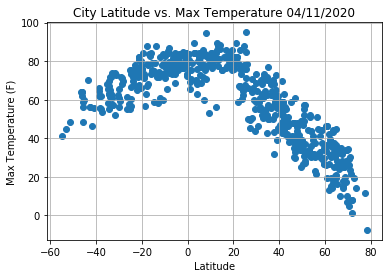

In [19]:
# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_MaxTemp.png")

# Show plot
plt.show()

##### The closer the equator, the greater the max temperature.  

#### Latitude vs. Humidity Plot

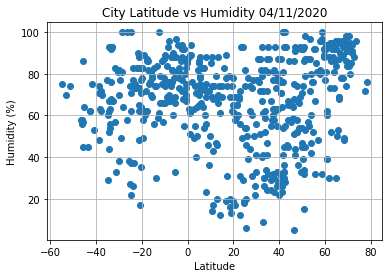

In [33]:
y_values = pd.to_numeric(weather_data['Humidity'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Humid.png")

# Show plot
plt.show()

##### Most cities have humidity above 40%.    

#### Latitude vs. Cloudiness Plot

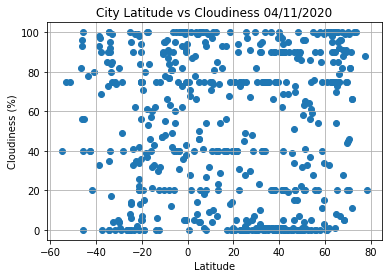

In [34]:
y_values = pd.to_numeric(weather_data['Cloudiness'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Cloud.png")

# Show plot
plt.show()

##### There does not appear to be a relationship between cloudiness and location.   

#### Latitude vs. Wind Speed Plot

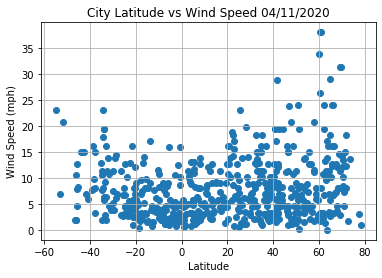

In [35]:
y_values = pd.to_numeric(weather_data['Wind Speed'], downcast="float")

# Build a scatter plot for each data type
plt.scatter(x_values, y_values, marker='o')

# Incorporate the other graph properties
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)") ; plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_vs_Wind.png")

# Show plot
plt.show()

##### Wind speed generally falls below 15 mph.  Outliers increase the further you get from the equator. 

## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots

In [37]:
weather_data_df= pd.DataFrame(weather_data)
weather_data_df

,City,Country,Date,Lat,Lng,Humidity,Cloudiness,Wind Speed,Max Temp
0,taolanaro,,,,,,,,
1,hermanus,ZA,2020-04-11 16:46:54,-34.42,19.23,93,100,18.01,63
2,atuona,PF,2020-04-11 16:46:55,-9.8,-139.03,66,48,5.77,82.89
3,margate,GB,2020-04-11 16:46:55,51.38,1.39,87,41,3.36,57
4,mataura,NZ,2020-04-11 16:46:55,-46.19,168.86,58,93,1.99,64
...,...,...,...,...,...,...,...,...,...
601,korla,CN,2020-04-11 16:49:40,41.76,86.15,41,69,4,59
602,kuty,UA,2020-04-11 16:49:41,48.26,25.18,67,0,1.21,37.54
603,mafeteng,LS,2020-04-11 16:49:41,-29.82,27.24,38,4,7.54,56.34
604,marrakesh,MA,2020-04-11 16:49:41,31.63,-8.01,72,94,5.82,60.8


In [39]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) > 0]
south_hem_df = weather_data_df.loc[pd.to_numeric(weather_data_df["Lat"]).astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.95x + 89.88
The r-squared is: -0.8954924730125826


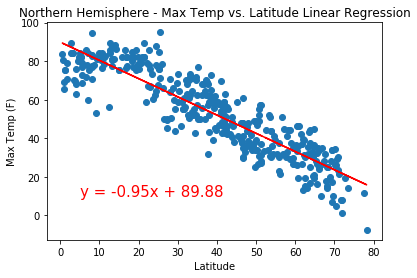

In [63]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Max Temp'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/NH_Lat_vs_Temp.png")

plt.show()

##### The max temp fits the regression line which indicated a fairly strong correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.54x + 82.2
The r-squared is: 0.7540038105108582


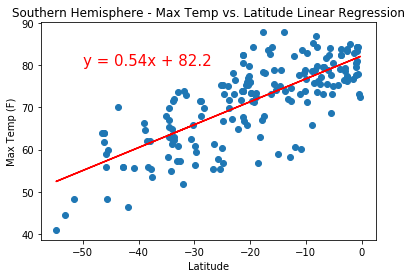

In [64]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Max Temp'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/SH_Lat_vs_Temp.png")

plt.show()

##### The max temp fits the regression line which indicated a fairly strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.31x + 53.71
The r-squared is: 0.2724276606341106


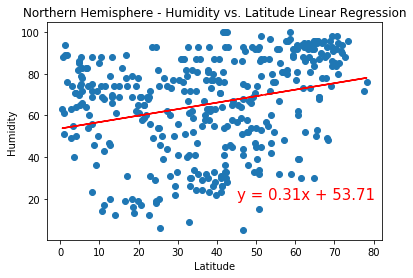

In [57]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Humidity'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/NH_Lat_vs_Humid.png")

plt.show()

##### The humidity does not fit the regression line which indicated a poor correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.37x + 78.76
The r-squared is: 0.30498365415892026


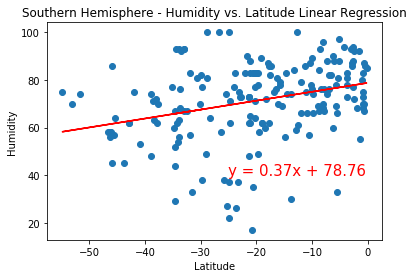

In [58]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Humidity'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/SH_Lat_vs_Humid.png")

plt.show()

##### The humidity does not fit the regression line which indicated a poor correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.22x + 40.39
The r-squared is: 0.11740290649773762


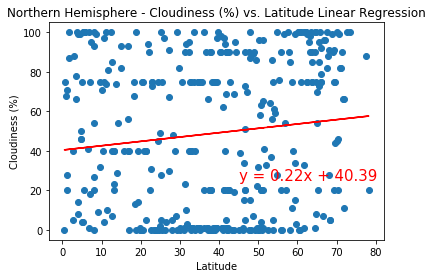

In [59]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Cloudiness'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/NH_Lat_vs_Clouds.png")

plt.show()

##### The cloudiness does not fit the regression line which indicates a poor correlation or almost non existant.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 60.21
The r-squared is: 0.09116801705168097


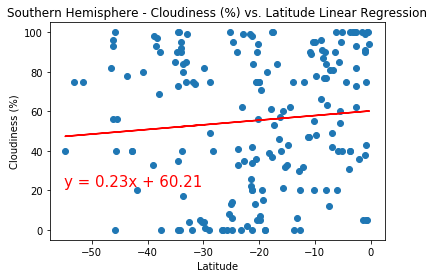

In [60]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Cloudiness'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/SH_Lat_vs_Clouds.png")

plt.show()

##### The cloudiness does not fit the regression line which indicates a poor correlation or almost non existant.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.07x + 5.71
The r-squared is: 0.21992792581854964


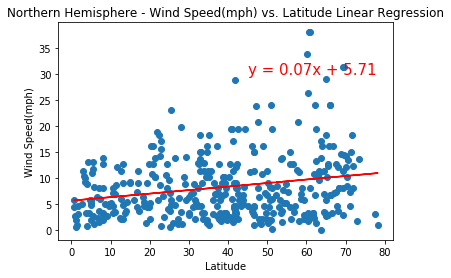

In [61]:
x_values = pd.to_numeric(north_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(north_hem_df['Wind Speed'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/NH_Lat_vs_Wind.png")

plt.show()

##### The wind speed does not fit the regression line which indicates a poor correlation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 3.7
The r-squared is: -0.41945686296880413


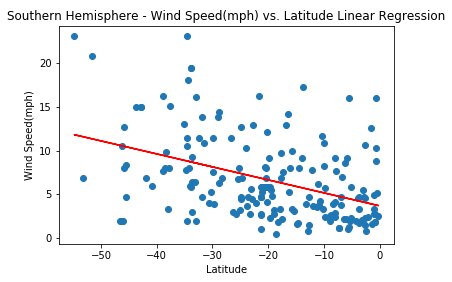

In [62]:
x_values = pd.to_numeric(south_hem_df['Lat'], downcast="float")
y_values = pd.to_numeric(south_hem_df['Wind Speed'], downcast="float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")

# Save the figure
plt.savefig("../output_data/SH_Lat_vs_Wind.png")

plt.show()

##### The windspeed does not fit the regression line which indicates a poor correlation but it is higher than the northern hemisphere